# Exploratory Data Analysis (EDA)

## 1. 5G NIDD Dataset

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

pd.set_option('display.max_columns', None)

In [9]:
file_path = 'Datasets/5G NIDD/Encoded.csv'
if os.path.exists(file_path):
    df_5g_nidd = pd.read_csv(file_path)
    print('5G NIDD dataset loaded successfully.')
else:
    print(f'File not found: {file_path}')

5G NIDD dataset loaded successfully.


In [10]:
df_5g_nidd.head()

,Unnamed: 0,Seq,Dur,RunTime,Mean,Sum,Min,Max,sTos,dTos,sTtl,dTtl,sHops,dHops,TotPkts,SrcPkts,DstPkts,TotBytes,SrcBytes,DstBytes,Offset,sMeanPktSz,dMeanPktSz,Load,SrcLoad,DstLoad,Loss,SrcLoss,DstLoss,pLoss,SrcGap,DstGap,Rate,SrcRate,DstRate,SrcWin,DstWin,sVid,dVid,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,Label,Attack Type,Attack Tool,*,* V,* f,e,e f,e &,e *,e d,e g,e i,e r,e s,eU,e,arp,icmp,ipv6-icmp,llc,lldp,sctp,tcp,udp,ACC,CON,ECO,FIN,INT,NRS,REQ,RSP,RST,TST,URP,Shutdown,Start,Status,39,4,52,54,af11,af12,af41,cs0,cs4,cs6,cs7,ef,nan
0,0,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,58.0,NaN,6.0,NaN,1,1,0,98,98,0,128,98.000000,0.000000,0.0000,0.0000,0.000000,0,0,0,0.0,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,Benign,Benign,Benign,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,58.0,NaN,6.0,NaN,1,1,0,98,98,0,232,98.000000,0.000000,0.0000,0.0000,0.000000,0,0,0,0.0,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,Benign,Benign,Benign,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2,3,4.998020,4.998020,4.998020,4.998020,4.998020,4.998020,0.0,0.0,117.0,64.0,11.0,0.0,214,196,18,249093,244212,4881,336,1245.979614,271.166656,396280.1250,388901.1875,7378.921875,0,0,0,0.0,NaN,NaN,42.616875,39.015450,3.401347,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,Benign,Benign,Benign,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3,4,4.998037,4.998037,4.998037,4.998037,4.998037,4.998037,0.0,0.0,117.0,64.0,11.0,0.0,184,163,21,221712,216245,5467,440,1326.656494,260.333344,352339.9375,344005.4688,8334.472656,0,0,0,0.0,NaN,NaN,36.614376,32.412727,4.001571,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,Benign,Benign,Benign,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,4,5,4.999453,4.999453,4.999453,4.999453,4.999453,4.999453,0.0,0.0,117.0,64.0,11.0,0.0,223,204,19,280216,275723,4493,544,1351.583374,236.473679,445855.1563,439043.2188,6811.945312,0,0,0,0.0,NaN,NaN,44.404858,40.604443,3.600394,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,Benign,Benign,Benign,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [44]:
print(df_5g_nidd['Attack Tool'].unique())
print(df_5g_nidd['Attack Type'].unique())


['Benign' 'Nmap' 'Hping3' 'Goldeneye' 'Slowloris' 'Torshammer']
['Benign' 'SYNScan' 'TCPConnectScan' 'UDPScan' 'ICMPFlood' 'UDPFlood'
 'SYNFlood' 'HTTPFlood' 'SlowrateDoS']


In [11]:
df_5g_nidd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215890 entries, 0 to 1215889
Data columns (total 96 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Unnamed: 0   1215890 non-null  int64  
 1   Seq          1215890 non-null  int64  
 2   Dur          1215890 non-null  float64
 3   RunTime      1215890 non-null  float64
 4   Mean         1215890 non-null  float64
 5   Sum          1215890 non-null  float64
 6   Min          1215890 non-null  float64
 7   Max          1215890 non-null  float64
 8   sTos         1215676 non-null  float64
 9   dTos         272823 non-null   float64
 10  sTtl         1215676 non-null  float64
 11  dTtl         272823 non-null   float64
 12  sHops        1215676 non-null  float64
 13  dHops        272823 non-null   float64
 14  TotPkts      1215890 non-null  int64  
 15  SrcPkts      1215890 non-null  int64  
 16  DstPkts      1215890 non-null  int64  
 17  TotBytes     1215890 non-null  int64  
 18  Sr

In [12]:
df_5g_nidd.describe()

,Unnamed: 0,Seq,Dur,RunTime,Mean,Sum,Min,Max,sTos,dTos,sTtl,dTtl,sHops,dHops,TotPkts,SrcPkts,DstPkts,TotBytes,SrcBytes,DstBytes,Offset,sMeanPktSz,dMeanPktSz,Load,SrcLoad,DstLoad,Loss,SrcLoss,DstLoss,pLoss,SrcGap,DstGap,Rate,SrcRate,DstRate,SrcWin,DstWin,sVid,dVid,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,*,* V,* f,e,e f,e &,e *,e d,e g,e i,e r,e s,eU,e,arp,icmp,ipv6-icmp,llc,lldp,sctp,tcp,udp,ACC,CON,ECO,FIN,INT,NRS,REQ,RSP,RST,TST,URP,Shutdown,Start,Status,39,4,52,54,af11,af12,af41,cs0,cs4,cs6,cs7,ef,nan
count,1.215890e+06,1.215890e+06,1.215890e+06,1.215890e+06,1.215890e+06,1.215890e+06,1.215890e+06,1.215890e+06,1.215676e+06,272823.000000,1.215676e+06,272823.000000,1.215676e+06,272823.000000,1.215890e+06,1.215890e+06,1.215890e+06,1.215890e+06,1.215890e+06,1.215890e+06,1.215890e+06,1.215890e+06,1.215890e+06,1.215890e+06,1.215890e+06,1.215890e+06,1.215890e+06,1.215890e+06,1.215890e+06,1.215890e+06,278671.000000,278671.000000,1.215890e+06,1.215890e+06,1.215890e+06,2.424200e+05,1.770780e+05,114571.0,2009.0,2.786710e+05,2.300470e+05,1.215890e+06,1.215890e+06,1.215890e+06,1.215890e+06,1.215890e+06,1.215890e+06,1.215890e+06,1.215890e+06,1.215890e+06,1.215890e+06,1.215890e+06,1.215890e+06,1.215890e+06,1.215890e+06,1.215890e+06,1.215890e+06,1.215890e+06,1.215890e+06,1.215890e+06,1.215890e+06,1.215890e+06,1.215890e+06,1.215890e+06,1.215890e+06,1.215890e+06,1.215890e+06,1.215890e+06,1.215890e+06,1.215890e+06,1.215890e+06,1.215890e+06,1.215890e+06,1.215890e+06,1.215890e+06,1.215890e+06,1.215890e+06,1.215890e+06,1.215890e+06,1.215890e+06,1.215890e+06,1.215890e+06,1.215890e+06,1.215890e+06,1.215890e+06,1.215890e+06,1.215890e+06,1.215890e+06,1.215890e+06,1.215890e+06,1.215890e+06,1.215890e+06,1.215890e+06
mean,6.079445e+05,4.034334e+04,1.364841e+00,1.364841e+00,1.364841e+00,1.364841e+00,1.364841e+00,1.364841e+00,8.643825e-01,2.637593,8.145447e+01,65.323638,2.257100e+00,5.024214,5.144951e+00,3.700822e+00,1.444128e+00,3.646881e+03,2.532679e+03,1.114202e+03,1.237943e+07,7.401253e+01,6.189247e+01,4.928977e+06,1.394168e+05,4.789994e+06,2.287460e-02,1.323804e-02,9.644787e-03,3.494910e-01,0.052287,1.150898,9.341320e+02,2.380105e+02,4.999662e+02,9.149689e+05,6.951336e+04,610.0,610.0,2.044248e+09,2.146305e+09,4.669759e-03,5.816065e-04,4.088152e-03,4.039839e-03,1.973863e-05,9.186851e-02,8.857421e-01,2.282279e-03,3.783237e-05,1.307684e-04,5.693772e-03,7.237497e-05,5.551489e-04,1.354563e-03,7.550848e-03,6.480849e-04,4.112214e-06,3.372016e-05,2.437392e-02,1.644886e-06,4.770168e-05,9.458092e-05,3.558710e-03,2.291910e-01,7.426988e-01,9.120891e-04,1.087056e-01,2.370445e-02,4.867299e-02,2.703748e-01,1.644886e-06,4.846647e-01,6.003833e-05,6.223425e-02,2.302840e-05,6.464401e-04,5.773549e-04,4.001373e-01,5.992853e-01,8.224428e-07,6.086077e-05,1.184318e-04,8.224428e-07,6.489074e-04,1.126747e-04,4.235581e-04,9.945110e-01,7.648718e-05,5.263634e-04,4.342498e-04,2.909803e-03,1.760028e-04
std,3.509974e+05,3.777201e+04,1.691295e+00,1.691295e+00,1.691295e+00,1.691295e+00,1.691295e+00,1.691295e+00,1.251895e+01,21.037454,5.592673e+01,28.091431,3.564295e+00,2.294874,2.482010e+01,1.841220e+01,1.246576e+01,3.018259e+04,2.446576e+04,1.678465e+04,1.070055e+07,1.456666e+02,2.150808e+02,5.945779e+08,1.308229e+07,5.847095e+08,2.479449e-01,1.766426e-01,1.558893e-01,3.672013e+00,10.516885,139.820039,8.541114e+04,2.236956e+04,5.657329e+04,4.991476e+06,2.021164e+05,0.0,0.0,1.233429e+09,1.243342e+09,1.742817e-02,1.305568e-02,1.053588e-02,6.343124e-02,4.442776e-03,2.888404e-01,3.181243e-01,4.771867e-02,6.150689e-03,1.143466e-02,7.524199e-02,8.507044e-03,2.355507e-02,3.677947e-02,8.656696e-02,2.544927e-02,2.027856e-03,5.806810e-03,1.542072e-01,1.282530e-03,6.906479e-03,9.724817e-03,5.954871e-02,4.203125e-01,4.371470e-01,3.018705e-02,3.112696e-01,1.521268e-01,2.151836e-01,4.441536e-01,1.282530e-03,4.997650e-01,7.748211e-03,2.415806e-01,4.798738e-03,2.541698e-02,2.402128e-02,4.899262e-01,4.900435e-01,9.068863e-04,7.801097e-03,1.088200e-02,9.068863e-04,2.546540e-02,1.061424e-02,2.057618

In [13]:
df_5g_nidd.isnull().sum()

Unnamed: 0    0
Seq           0
Dur           0
RunTime       0
Mean          0
             ..
cs4           0
cs6           0
cs7           0
ef            0
nan           0
Length: 96, dtype: int64

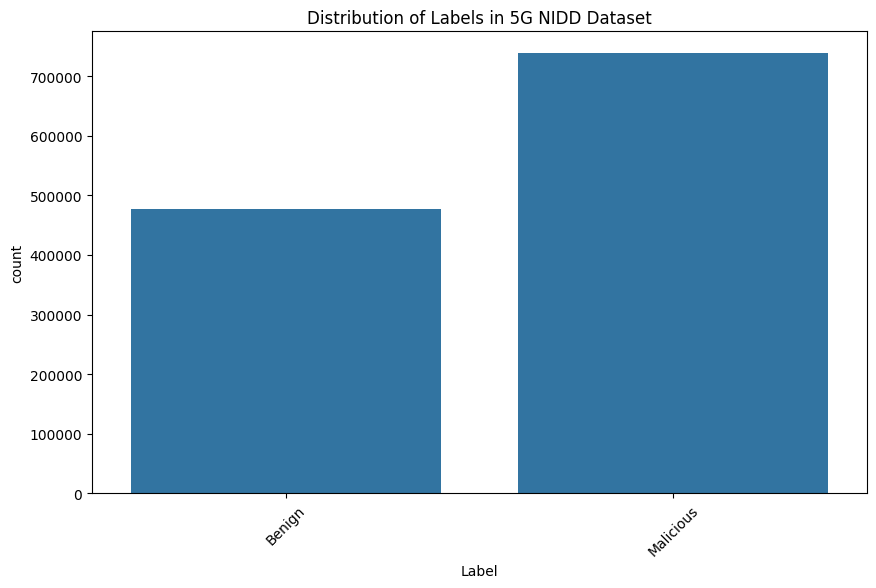

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Label', data=df_5g_nidd)
plt.title('Distribution of Labels in 5G NIDD Dataset')
plt.xticks(rotation=45)
plt.show()

### Summary of 5G NIDD Dataset
- The dataset is loaded from `Encoded.csv`.
- The dataset contains X columns and Y rows.
- There are Z missing values.
- The distribution of the 'Label' column shows that the dataset is imbalanced/balanced.

## 2. CIC-IDS17 Dataset

In [15]:
cic_ids17_dir = 'Datasets/CIC-IDS17/'
cic_ids17_files = [os.path.join(cic_ids17_dir, f) for f in os.listdir(cic_ids17_dir) if f.endswith('.csv')]
if cic_ids17_files:
    df_cic_ids17 = pd.concat([pd.read_csv(f, encoding='latin1') for f in cic_ids17_files], ignore_index=True)
    print('CIC-IDS17 dataset loaded and combined successfully.')
else:
    print('No CSV files found for CIC-IDS17.')

CIC-IDS17 dataset loaded and combined successfully.


In [16]:
df_cic_ids17.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22,166,1,1,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.000000,12048.192770,166.0000,0.000000e+00,166,166,0,0.0000,0.000,0,0,0,0.0,0.0,0,0,0,0,0,0,32,32,6024.096386,6024.096386,0,0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,1,0.0,0.0,0.0,32,0,0,0,0,0,0,1,0,1,0,290,243,0,32,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
1,60148,83,1,2,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.000000,36144.578310,41.5000,1.060660e+01,49,34,0,0.0000,0.000,0,0,49,49.0,0.0,49,49,0,0,0,0,32,64,12048.192770,24096.385540,0,0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,2,0.0,0.0,0.0,32,0,0,0,0,0,0,1,0,2,0,243,290,0,32,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
2,123,99947,1,1,48,48,48,48,48.0,0.0,48,48,48.0,0.0,960.509070,20.010606,99947.0000,0.000000e+00,99947,99947,0,0.0000,0.000,0,0,0,0.0,0.0,0,0,0,0,0,0,40,40,10.005303,10.005303,48,48,48.0,0.0,0.0,0,0,0,0,0,0,0,0,1,72.0,48.0,48.0,40,0,0,0,0,0,0,1,48,1,48,-1,-1,0,40,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
3,123,37017,1,1,48,48,48,48,48.0,0.0,48,48,48.0,0.0,2593.403031,54.029230,37017.0000,0.000000e+00,37017,37017,0,0.0000,0.000,0,0,0,0.0,0.0,0,0,0,0,0,0,32,32,27.014615,27.014615,48,48,48.0,0.0,0.0,0,0,0,0,0,0,0,0,1,72.0,48.0,48.0,32,0,0,0,0,0,0,1,48,1,48,-1,-1,0,32,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
4,0,111161336,147,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.000000,1.322402,761379.0137,2.539814e+06,13600000,0,111000000,761379.0137,2539814.273,13600000,0,0,0.0,0.0,0,0,0,0,0,0,0,0,1.322402,0.000000,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,147,0,0,0,-1,-1,0,0,1753752.625,2123197.578,4822992,95,9463032.7,2657727.996,13600000,5700287,BENIGN


In [17]:
df_cic_ids17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830743 entries, 0 to 2830742
Data columns (total 79 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int64  
 1    Flow Duration                int64  
 2    Total Fwd Packets            int64  
 3    Total Backward Packets       int64  
 4   Total Length of Fwd Packets   int64  
 5    Total Length of Bwd Packets  int64  
 6    Fwd Packet Length Max        int64  
 7    Fwd Packet Length Min        int64  
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         int64  
 11   Bwd Packet Length Min        int64  
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IAT Max         

In [18]:
df_cic_ids17.describe()

/opt/anaconda3/envs/pytorch_env/lib/python3.13/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/opt/anaconda3/envs/pytorch_env/lib/python3.13/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.829385e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2830743.0,2.830743e+06,2830743.0,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2830743.0,2830743.0,2830743.0,2830743.0,2830743.0,2830743.0,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06
mean,8.071483e+03,1.478566e+07,9.361160e+00,1.039377e+01,5.493024e+02,1.616264e+04,2.075999e+02,1.871366e+01,5.820194e+01,6.891013e+01,8.708495e+02,4.104958e+01,3.059493e+02,3.353257e+02,inf,inf,1.298449e+06,2.919271e+06,9.182475e+06,1.623796e+05,1.448296e+07,2.610193e+06,3.266957e+06,9.042939e+06,1.021893e+06,9.893830e+06,1.805784e+06,1.485973e+06,4.684692e+06,9.672614e+05,4.644646e-02,0.0,1.112782e-04,0.0,-2.599739e+04,-2.273275e+03,6.386535e+04,6.995192e+03,1.643450e+01,9.504024e+02,1.719444e+02,2.949756e+02,4.861548e+05,3.537976e-02,4.644646e-02,2.423392e-04,2.980705e-01,3.158443e-01,9.482316e-02,1.112782e-04,2.433990e-04,6.835004e-01,1.919837e+02,5.820194e+01,3.059493e+02,-2.599739e+04,0.0,0.0,0.0,0.0,0.0,0.0,9.361160e+00,5.492919e+02,1.039377e+01,1.616230e+04,6.989837e+03,1.989433e+03,5.418218e+00,-2.741688e+03,8.155132e+04,4.113412e+04,1.531825e+05,5.829582e+04,8.316037e+06,5.038439e+05,8.695752e+06,7.920031e+06
std,1.828363e+04,3.365374e+07,7.496728e+02,9.973883e+02,9.993589e+03,2.263088e+06,7.171848e+02,6.033935e+01,1.860912e+02,2.811871e+02,1.946367e+03,6.886260e+01,6.052568e+02,8.396932e+02,NaN,NaN,4.507944e+06,8.045870e+06,2.445954e+07,2.950282e+06,3.357581e+07,9.525722e+06,9.639055e+06,2.452916e+07,8.591436e+06,2.873661e+07,8.887197e+06,6.278469e+06,1.716095e+07,8.308983e+06,2.104500e-01,0.0,1.054826e-02,0.0,2.105286e+07,1.452209e+06,2.475371e+05,3.815170e+04,2.523772e+01,2.028229e+03,3.054915e+02,6.318001e+02,1.647490e+06,1.847378e-01,2.104500e-01,1.556536e-02,4.574107e-01,4.648513e-01,2.929706e-01,1.054826e-02,1.559935e-02,6.804920e-01,3.318603e+02,1.860912e+02,6.052568e+02,2.105286e+07,0.0,0.0,0.0,0.0,0.0,0.0,7.496728e+02,9.980070e+03,9.973883e+02,2.26305

In [19]:
df_cic_ids17.isnull().sum()

 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
 Idle Std                      0
 Idle Max                      0
 Idle Min                      0
 Label                         0
Length: 79, dtype: int64

In [20]:
# The dataset has mixed types in some columns, so we need to handle errors.
for col in df_cic_ids17.columns:
    if df_cic_ids17[col].dtype == 'object':
        try:
            df_cic_ids17[col] = pd.to_numeric(df_cic_ids17[col])
        except (ValueError, TypeError):
            pass

df_cic_ids17.replace([np.inf, -np.inf], np.nan, inplace=True)
df_cic_ids17.fillna(df_cic_ids17.mean(numeric_only=True), inplace=True)

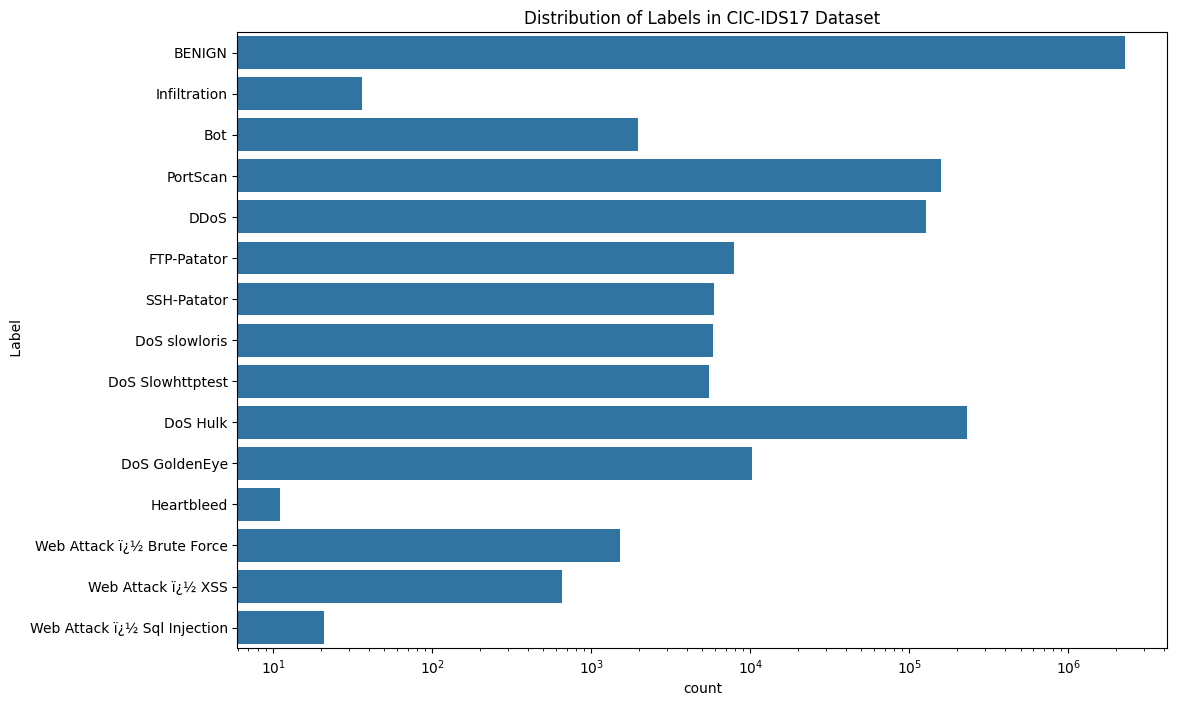

In [21]:
plt.figure(figsize=(12, 8))
sns.countplot(y=df_cic_ids17[' Label'])
plt.title('Distribution of Labels in CIC-IDS17 Dataset')
plt.xscale('log')
plt.show()

### Summary of CIC-IDS17 Dataset
- The dataset is combined from multiple CSV files in the `Datasets/CIC-IDS17` directory.
- The dataset has a large number of columns, and some of them required cleaning (handling mixed types, infinity values, and missing data).
- The distribution of the ' Label' column is highly imbalanced, with 'BENIGN' being the most frequent class.

## 3. CSE-CIC-IDS2018 Dataset

In [22]:
cse_cic_ids2018_dir = 'Datasets/CSE-CIC-IDS2018/'
cse_cic_ids2018_files = [os.path.join(cse_cic_ids2018_dir, f) for f in os.listdir(cse_cic_ids2018_dir) if f.endswith('.csv')]
if cse_cic_ids2018_files:
    df_cse_cic_ids2018 = pd.concat([pd.read_csv(f) for f in cse_cic_ids2018_files], ignore_index=True)
    print('CSE-CIC-IDS2018 dataset loaded and combined successfully.')
else:
    print('No CSV files found for CSE-CIC-IDS2018.')

/var/folders/7p/03nnx75d40v6fv73t6vxnj1h0000gn/T/ipykernel_7617/1949794132.py:4: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types. Specify dtype option on import or set low_memory=False.
  df_cse_cic_ids2018 = pd.concat([pd.read_csv(f) for f in cse_cic_ids2018_files], ignore_index=True)
/var/folders/7p/03nnx75d40v6fv73t6vxnj1h0000gn/T/ipykernel_7617/1949794132.py:4: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types. Specify dtype option on import or set low_memory=False.
  df_cse_cic_ids2018 = pd.concat([pd.read_csv(f) for f in cse_cic_ids2018_files], ignore_in

CSE-CIC-IDS2018 dataset loaded and combined successfully.


In [23]:
df_cse_cic_ids2018.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Flow ID,Src IP,Src Port,Dst IP
0,0,0,14/02/2018 08:31:01,112641719,3,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.026633,56320859.5,139.300036,56320958,56320761,112641719,56320859.5,139.300036,56320958,56320761,0,0.0,0.0,0,0,0,0,0,0,0,0,0.026633,0.0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,0.0,0.0,0,0,56320859.5,139.300036,56320958,56320761,Benign,NaN,NaN,NaN,NaN
1,0,0,14/02/2018 08:33:50,112641466,3,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.026633,56320733.0,114.551299,56320814,56320652,112641466,56320733.0,114.551299,56320814,56320652,0,0.0,0.0,0,0,0,0,0,0,0,0,0.026633,0.0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,0.0,0.0,0,0,56320733.0,114.551299,56320814,56320652,Benign,NaN,NaN,NaN,NaN
2,0,0,14/02/2018 08:36:39,112638623,3,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.026634,56319311.5,301.934596,56319525,56319098,112638623,56319311.5,301.934596,56319525,56319098,0,0.0,0.0,0,0,0,0,0,0,0,0,0.026634,0.0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,0.0,0.0,0,0,56319311.5,301.934596,56319525,56319098,Benign,NaN,NaN,NaN,NaN
3,22,6,14/02/2018 08:40:13,6453966,15,10,1239,2273,744,0,82.6,196.741237,976,0,227.3,371.677892,544.161528,3.873587,268915.25,247443.778966,673900,22,6453966,460997.571429,123109.423588,673900,229740,5637902,626433.555556,455082.214224,1167293,554,0,0,0,0,488,328,2.324152,1.549435,0,976,135.076923,277.83476,77192.153846,0,0,0,1,0,0,0,0,0,140.48,82.6,227.3,0,0,0,0,0,0,15,1239,10,2273,65535,233,6,32,0.0,0.0,0,0,0.0,0.0,0,0,Benign,NaN,NaN,NaN,NaN
4,22,6,14/02/2018 08:40:23,8804066,14,11,1143,2209,744,0,81.642857,203.745545,976,0,200.818182,362.249864,380.733175,2.839597,366836.083333,511356.609733,1928102,21,8804066,677235.846154,532416.970959,1928102,246924,7715481,771548.1,755543.082717,2174893,90,0,0,0,0,456,360,1.590174,1.249423,0,976,128.923077,279.763032,78267.353846,0,0,0,1,0,0,0,0,0,134.08,81.642857,200.818182,0,0,0,0,0,0,14,1143,11,2209,5808,233,6,32,0.0,0.0,0,0,0.0,0.0,0,0,Benign,NaN,NaN,NaN,NaN


In [24]:
df_cse_cic_ids2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16233002 entries, 0 to 16233001
Data columns (total 84 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Dst Port           object 
 1   Protocol           object 
 2   Timestamp          object 
 3   Flow Duration      object 
 4   Tot Fwd Pkts       object 
 5   Tot Bwd Pkts       object 
 6   TotLen Fwd Pkts    object 
 7   TotLen Bwd Pkts    object 
 8   Fwd Pkt Len Max    object 
 9   Fwd Pkt Len Min    object 
 10  Fwd Pkt Len Mean   object 
 11  Fwd Pkt Len Std    object 
 12  Bwd Pkt Len Max    object 
 13  Bwd Pkt Len Min    object 
 14  Bwd Pkt Len Mean   object 
 15  Bwd Pkt Len Std    object 
 16  Flow Byts/s        object 
 17  Flow Pkts/s        object 
 18  Flow IAT Mean      object 
 19  Flow IAT Std       object 
 20  Flow IAT Max       object 
 21  Flow IAT Min       object 
 22  Fwd IAT Tot        object 
 23  Fwd IAT Mean       object 
 24  Fwd IAT Std        object 
 25  Fwd IAT Max     

In [25]:
df_cse_cic_ids2018.describe()

,Src Port
count,7.948748e+06
mean,4.527693e+04
std,2.112095e+04
min,0.000000e+00
25%,4.970600e+04
50%,5.241300e+04
75%,5.779900e+04
max,6.553500e+04


In [26]:
df_cse_cic_ids2018.isnull().sum().sum()

np.int64(33196737)

In [27]:
df_cse_cic_ids2018.replace([np.inf, -np.inf], np.nan, inplace=True)
df_cse_cic_ids2018.dropna(inplace=True)

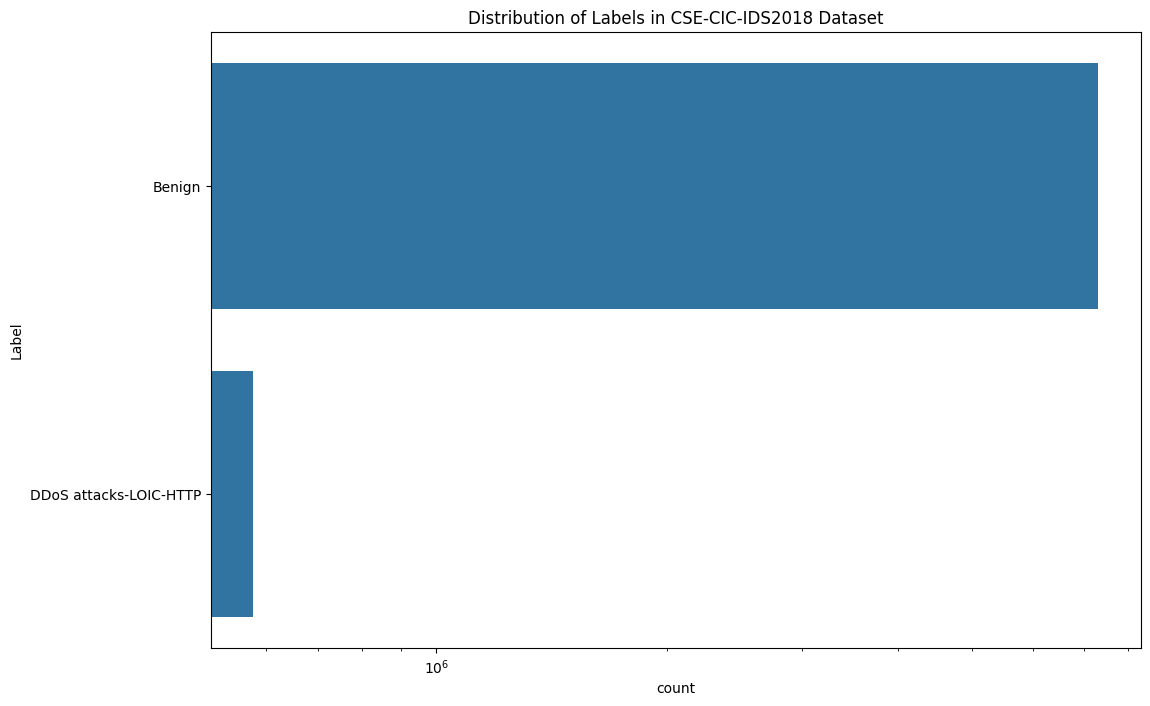

In [28]:
plt.figure(figsize=(12, 8))
sns.countplot(y=df_cse_cic_ids2018['Label'])
plt.title('Distribution of Labels in CSE-CIC-IDS2018 Dataset')
plt.xscale('log')
plt.show()

### Summary of CSE-CIC-IDS2018 Dataset
- The dataset is combined from multiple CSV files in the `Datasets/CSE-CIC-IDS2018` directory.
- The dataset contains a large number of rows and columns.
- Some rows with missing or infinite values were dropped.
- The label distribution is highly imbalanced.

## 4. UNSW_NB15 Dataset

In [29]:
unsw_nb15_path = 'Datasets/UNSW_NB15/UNSW_NB15_training-set.csv'
if os.path.exists(unsw_nb15_path):
    df_unsw_nb15 = pd.read_csv(unsw_nb15_path)
    print('UNSW_NB15 training dataset loaded successfully.')
else:
    print(f'File not found: {unsw_nb15_path}')

UNSW_NB15 training dataset loaded successfully.


In [30]:
df_unsw_nb15.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,254,0,180363632.0,0.0,0,0,0.011,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,248,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,254,0,881000000.0,0.0,0,0,0.008,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,881,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,254,0,854400000.0,0.0,0,0,0.005,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,534,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,254,0,600000000.0,0.0,0,0,0.006,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,450,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,254,0,850400000.0,0.0,0,0,0.010,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,1063,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0


In [31]:
df_unsw_nb15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

In [32]:
df_unsw_nb15.describe()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,82332.000000,82332.000000,82332.000000,82332.000000,8.233200e+04,8.233200e+04,8.233200e+04,82332.000000,82332.000000,8.233200e+04,8.233200e+04,82332.000000,82332.000000,82332.000000,82332.000000,8.233200e+04,82332.000000,82332.00000,8.233200e+04,8.233200e+04,82332.00000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,8.233200e+04,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,41166.500000,1.006756,18.666472,17.545936,7.993908e+03,1.323379e+04,8.241089e+04,180.967667,95.713003,6.454902e+07,6.305470e+05,4.753692,6.308556,755.394301,121.701284,6.363075e+03,535.180430,133.45908,1.084642e+09,1.073465e+09,128.28662,0.055925,0.029256,0.026669,139.528604,116.275069,0.094277,1.595372e+03,9.546604,1.369273,5.744923,4.928898,3.663011,7.456360,0.008284,0.008381,0.129743,6.468360,9.164262,0.011126,0.550600
std,23767.345519,4.710444,133.916353,115.574086,1.716423e+05,1.514715e+05,1.486204e+05,101.513358,116.667722,1.798618e+08,2.393001e+06,64.649620,55.708021,6182.615732,1292.378499,5.672402e+04,3635.305383,127.35700,1.390860e+09,1.381996e+09,127.49137,0.116022,0.070854,0.055094,208.472063,244.600271,0.542922,3.806697e+04,11.090289,1.067188,8.418112,8.389545,5.915386,11.415191,0.091171,0.092485,0.638683,8.543927,11.121413,0.104891,0.497436
min,1.000000,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.00000,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,20583.750000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,2.860611e+01,62.000000,0.000000,1.120247e+04,0.000000e+00,0.000000,0.000000,0.008000,0.000000,0.000000e+00,0.000000,0.00000,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000,0.000000,57.000000,0.000000,0.000000,0.000000e+00,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
50%,41166.500000,0.014138,6.000000,2.000000,5.340000e+02,1.780000e+02,2.650177e+03,254.000000,29.000000,5.770032e+05,2.112951e+03,1.000000,0.000000,0.557929,0.010000,1.762392e+01,0.000000,255.00000,2.788886e+07,2.856975e+07,255.00000,0.000551,0.000441,0.000080,65.000000,44.000000,0.000000,0.000000e+00,5.000000,1.000000,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,1.000000
75%,61749.250000,0.719360,12.000000,10.000000,1.280000e+03,9.560000e+02,1.111111e+05,254.000000,252.000000,6.514286e+07,1.585808e+04,3.000000,2.000000,63.409444,63.136369,3.219332e+03,128.459914,255.00000,2.171310e+09,2.144205e+09,255.00000,0.105541,0.052596,0.048816,100.000000,87.000000,0.000000,0.000000e+00,11.000000,2.000000,6.000000,4.000000,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,1.000000
max,82332.000000,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,253.000000,5.268000e+09,2.082111e+07,5319.000000,5507.000000,60009.992000,57739.240000,1.483831e+06,463199.240100,255.00000,4.294950e+09,4.294881e+09,255.00000,3.821465,3.226788,2.928778,1504.000000,1500.000000,131.000000,5.242880e+06,63.000000,6.000000,59.000000,59.000000,38.000000,63.000000,2.000000,2.000000,16.000000,60.000000,62.000000,1.000000,1.000000


In [33]:
df_unsw_nb15.isnull().sum().sum()

np.int64(0)

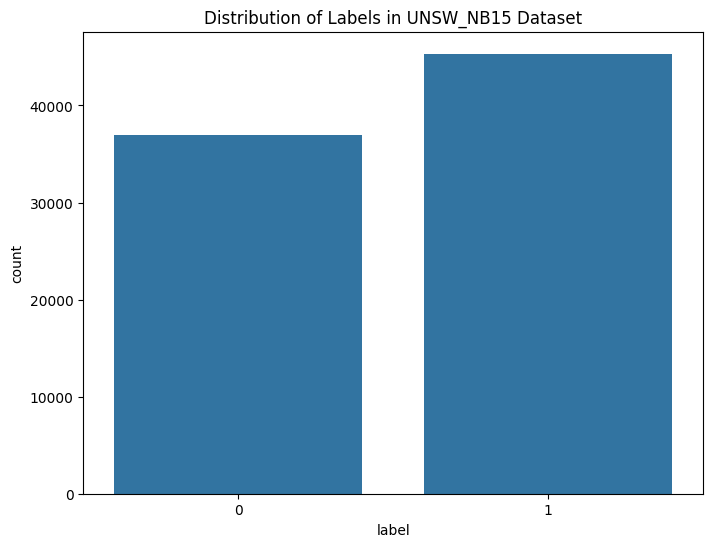

In [34]:
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df_unsw_nb15)
plt.title('Distribution of Labels in UNSW_NB15 Dataset')
plt.show()

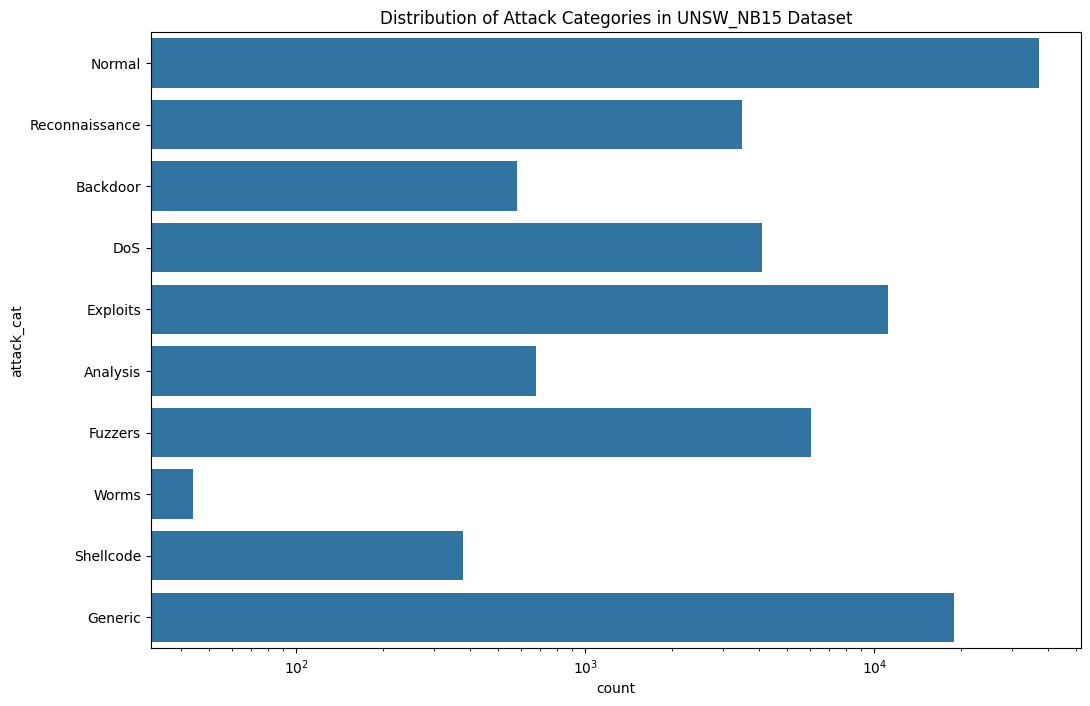

In [35]:
plt.figure(figsize=(12, 8))
sns.countplot(y='attack_cat', data=df_unsw_nb15)
plt.title('Distribution of Attack Categories in UNSW_NB15 Dataset')
plt.xscale('log')
plt.show()

### Summary of UNSW_NB15 Dataset
- The training set of UNSW_NB15 is loaded.
- The dataset has a binary 'label' column and a multi-class 'attack_cat' column.
- The 'label' column is imbalanced, with more normal traffic than attacks.
- The 'attack_cat' column shows the distribution of different attack types, with 'Generic' and 'Exploits' being the most common.

## 5. WEB-IDS23 Dataset

In [36]:
web_ids23_dir = 'Datasets/WEB-IDS23/'
web_ids23_files = [os.path.join(web_ids23_dir, f) for f in os.listdir(web_ids23_dir) if f.endswith('.csv')]
if web_ids23_files:
    df_web_ids23 = pd.concat([pd.read_csv(f) for f in web_ids23_files], ignore_index=True)
    print('WEB-IDS23 dataset loaded and combined successfully.')
else:
    print('No CSV files found for WEB-IDS23.')

WEB-IDS23 dataset loaded and combined successfully.


In [37]:
df_web_ids23.head()

,uid,ts,id.orig_h,id.resp_h,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,flow_pkts_per_sec,down_up_ratio,fwd_header_size_tot,fwd_header_size_min,fwd_header_size_max,bwd_header_size_tot,bwd_header_size_min,bwd_header_size_max,flow_FIN_flag_count,flow_SYN_flag_count,flow_RST_flag_count,fwd_PSH_flag_count,bwd_PSH_flag_count,flow_ACK_flag_count,fwd_URG_flag_count,bwd_URG_flag_count,flow_CWR_flag_count,flow_ECE_flag_count,payload_bytes_per_second,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,bwd_last_window_size,traffic_direction,attack,attack_type
0,a_Can0Xe4lKBZjnhkbRf,2023-07-08 23:06:57.493245952,192.168.100.23,192.168.100.218,ssl,1.944112,33.0,29.0,11.0,21.0,16.974332,14.916837,31.891170,0.878788,1040.0,20.0,40.0,936.0,32.0,40.0,2.0,2.0,2.0,11.0,21.0,59.0,0.0,0.0,0.0,0.0,70375.581440,64896.0,64320.0,0.0,502.0,client->server,attack,xss_https
1,a_Cn4jOM163xG1F8Z2Mj,2023-07-08 23:06:57.526097920,192.168.100.23,192.168.100.218,ssl,1.911198,50.0,45.0,11.0,40.0,26.161603,23.545442,49.707045,0.900000,1608.0,32.0,40.0,1448.0,32.0,40.0,2.0,2.0,0.0,11.0,40.0,94.0,0.0,0.0,0.0,0.0,258322.803620,64896.0,64320.0,1980.0,502.0,client->server,attack,xss_https
2,a_CxQEWfoDKHWnoodUa,2023-07-08 23:06:57.526170112,192.168.100.23,192.168.100.218,ssl,1.911320,26.0,28.0,8.0,22.0,13.603165,14.649562,28.252726,1.076923,840.0,32.0,40.0,904.0,32.0,40.0,2.0,2.0,0.0,8.0,20.0,53.0,0.0,0.0,0.0,0.0,70459.160181,64896.0,64320.0,1231.0,502.0,client->server,attack,xss_https
3,a_C3fRf2aFaE7HHGH6i,2023-07-08 23:06:57.526271232,192.168.100.23,192.168.100.218,ssl,1.911190,33.0,33.0,11.0,26.0,17.266731,17.266731,34.533462,1.000000,1040.0,20.0,40.0,1064.0,32.0,40.0,2.0,2.0,2.0,11.0,26.0,63.0,0.0,0.0,0.0,0.0,91269.323695,64896.0,64320.0,0.0,502.0,client->server,attack,xss_https
4,a_C5LRTv3ExWRd7eYHL7,2023-07-08 23:06:57.833542144,192.168.100.23,192.168.100.218,ssl,1.604048,18.0,15.0,7.0,12.0,11.221611,9.351342,20.572953,0.833333,584.0,32.0,40.0,488.0,32.0,40.0,2.0,2.0,0.0,7.0,12.0,32.0,0.0,0.0,0.0,0.0,35954.664748,64896.0,64320.0,502.0,502.0,client->server,attack,xss_https


In [38]:
df_web_ids23.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12059749 entries, 0 to 12059748
Data columns (total 38 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   uid                       object 
 1   ts                        object 
 2   id.orig_h                 object 
 3   id.resp_h                 object 
 4   service                   object 
 5   flow_duration             float64
 6   fwd_pkts_tot              float64
 7   bwd_pkts_tot              float64
 8   fwd_data_pkts_tot         float64
 9   bwd_data_pkts_tot         float64
 10  fwd_pkts_per_sec          float64
 11  bwd_pkts_per_sec          float64
 12  flow_pkts_per_sec         float64
 13  down_up_ratio             float64
 14  fwd_header_size_tot       float64
 15  fwd_header_size_min       float64
 16  fwd_header_size_max       float64
 17  bwd_header_size_tot       float64
 18  bwd_header_size_min       float64
 19  bwd_header_size_max       float64
 20  flow_FIN_flag_count   

In [39]:
df_web_ids23.describe(include='all')

,uid,ts,id.orig_h,id.resp_h,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,flow_pkts_per_sec,down_up_ratio,fwd_header_size_tot,fwd_header_size_min,fwd_header_size_max,bwd_header_size_tot,bwd_header_size_min,bwd_header_size_max,flow_FIN_flag_count,flow_SYN_flag_count,flow_RST_flag_count,fwd_PSH_flag_count,bwd_PSH_flag_count,flow_ACK_flag_count,fwd_URG_flag_count,bwd_URG_flag_count,flow_CWR_flag_count,flow_ECE_flag_count,payload_bytes_per_second,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,bwd_last_window_size,traffic_direction,attack,attack_type
count,12059749,12059749,12059749,12059749,3421760,1.205975e+07,1.205975e+07,1.205975e+07,1.205975e+07,1.205975e+07,1.205975e+07,1.205975e+07,1.205975e+07,1.205975e+07,1.205975e+07,1.205975e+07,1.205975e+07,1.205975e+07,1.205975e+07,1.205975e+07,1.205975e+07,1.205975e+07,1.205975e+07,1.205975e+07,1.205975e+07,1.205975e+07,12059749.0,12059749.0,12059749.0,12059749.0,1.205975e+07,1.205975e+07,1.205975e+07,1.205975e+07,1.205975e+07,12058033,12059749,12059749
unique,12059749,9206651,17,2656,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,2,22
top,a_Can0Xe4lKBZjnhkbRf,2023-09-05 07:25:00.621148160,192.168.100.23,192.168.100.218,ssl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,client->server,attack,portscan
freq,1,8,9243817,4038617,1221859,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11617911,11234562,5046406
mean,NaN,NaN,NaN,NaN,NaN,2.887582e+00,3.465974e+00,3.371959e+00,9.247107e-01,1.756895e+00,2.333160e+03,2.330526e+03,4.663686e+03,6.956834e-01,1.031204e+02,2.524960e+01,2.735031e+01,9.429151e+01,1.668767e+01,1.876895e+01,4.872954e-01,1.206066e+00,4.639414e-01,7.619101e-01,1.304912e+00,5.265331e+00,0.0,0.0,0.0,0.0,3.135364e+04,1.688896e+04,1.588892e+04,9.454368e+02,1.248782e+02,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,3.184644e+01,1.501475e+01,4.261168e+01,1.013560e+01,4.154711e+01,4.014033e+03,3.892716e+03,7.846219e+03,4.502024e-01,4.282041e+02,4.990879e+00,8.013972e+00,6.073515e+02,1.197498e+01,1.474790e+01,8.610427e-01,4.982631e-01,5.258887e-01,7.143160e+00,1.132884e+01,2.906482e+01,0.0,0.0,0.0,0.0,1.444444e+06,2.764727e+04,2.771558e+04,2.269808e+03,6.548562e+02,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,2.400000e+01,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00,1.024000e+03,0.000000e+00,5.070000e+02,0.000000e+00,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,2.140000e-04,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,5.736575e+01,5.739937e+01,1.153950e+02,1.000000e+00,2.400000e+01,2.400000e+01,2.400000e+01,2.000000e+01,2.000000e+01,2.000000e+01,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00,1.024000e+03,0.000000e+00,1.024000e+03,0.000000e+00,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,2.457900e-02,5.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00,4.202709e+03,4.202709e+03,8.405419e+03,1.000000e+00,6.400000e+01,2.400000e+01,2.400000e+01,6.400000e+01,2.000000e+01,2.000000e+01,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.0,0.0,0.0,0.0,5.382972e+02,1.024000e+03,0.000000e+00,1.024000e+03,0.00

In [40]:
df_web_ids23.isnull().sum().sum()

np.int64(8639705)

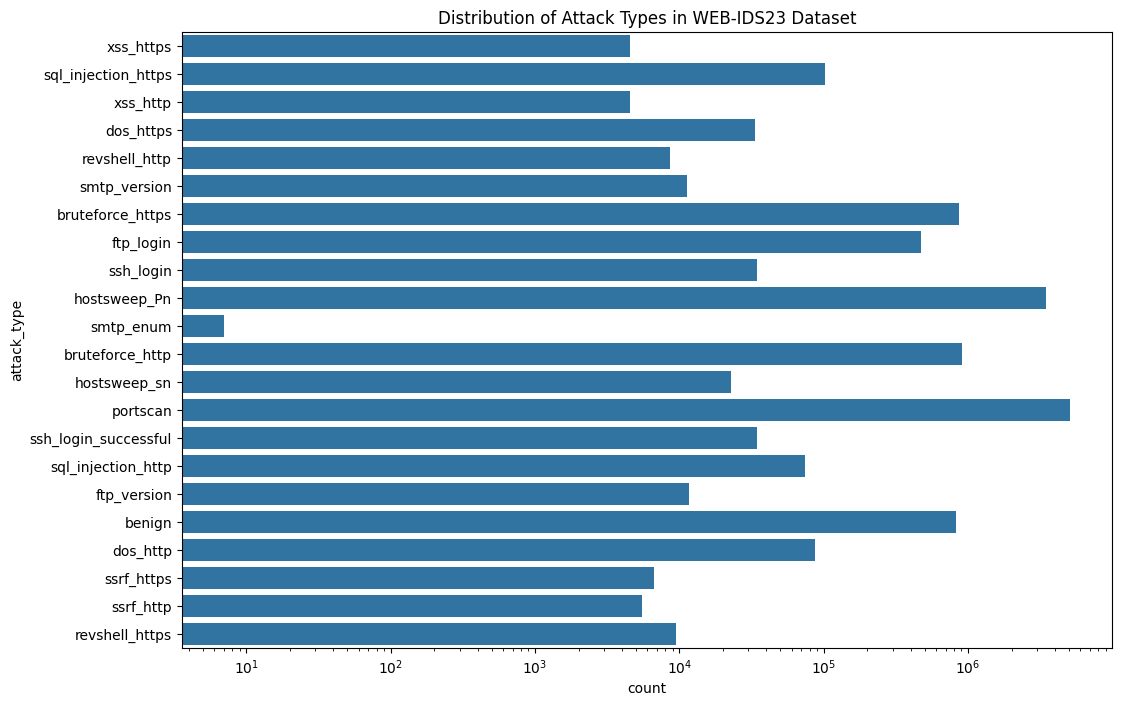

In [41]:
plt.figure(figsize=(12, 8))
sns.countplot(y='attack_type', data=df_web_ids23)
plt.title('Distribution of Attack Types in WEB-IDS23 Dataset')
plt.xscale('log')
plt.show()

### Summary of WEB-IDS23 Dataset
- The dataset is combined from multiple CSV files in the `Datasets/WEB-IDS23` directory.
- The dataset has a multi-class 'attack_type' column.
- The distribution of 'attack_type' is highly imbalanced, with 'benign' being the most frequent.